# Figure 2: Difference in Performance between different number of samples per site

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.interpolate import InterpolatedUnivariateSpline

In [7]:
df = pd.read_csv('../../outputs/fig3d_1000sim_summary.csv')
df

,Unnamed: 0,error_angle_mean,error_angle_median,error_angle_95,error_angle_std,n_tot,n,k,kappa_within_site,site_lat,site_long,outlier_rate,secular_method,kappa_secular,ignore_outliers
0,0,9.262602,8.569012,18.591303,4.912843,50,10,5,50,80,0.0,0.70,G,NaN,True
1,0,3.550049,3.329932,6.731394,1.786979,50,10,5,40,0,0.0,0.25,G,NaN,True
2,0,4.143934,3.826896,8.332449,2.255006,50,10,5,90,30,0.0,0.30,G,NaN,True
3,0,4.139856,3.824701,7.952438,2.188650,50,10,5,30,20,0.0,0.20,G,NaN,True
4,0,10.203641,9.261084,20.864174,5.602711,50,50,1,20,60,0.0,0.40,G,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,0,10.095548,9.410594,20.581676,5.511299,50,50,1,70,70,0.0,0.45,G,NaN,False
2876,0,5.842664,5.153486,12.375832,3.571008,50,50,1,50,0,0.0,0.35,G,NaN,False
2877,0,23.483899,20.085727,51.215433,15.056297,50,50,1,70,40,0.0,0.75,G,NaN,False
2878,0,4.416673,4.110313,8.530854,2.367333,50,50,1,70,70,0.0,0.10,G,NaN,False


Let's pick just one entry of the array (`kappa_within_site` and `latitude`) and see the different performances as a function of `outlier rate`.

In [3]:
def critical_outlier_rate(df_, kappa_within_site, site_lat):
    
    df_subset = df_[(df_.kappa_within_site==kappa_within_site) & (df_.site_lat==site_lat)]

    df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
    df5 = df_subset[df.k==5].sort_values(by="outlier_rate")
    
    outlier_rate = df1.outlier_rate
    error_1 = df1.error_angle_mean.values
    error_5 = df5.error_angle_mean.values
    error_diff = error_1 - error_5
    
    roots = InterpolatedUnivariateSpline(outlier_rate, error_diff).roots()
    
    assert len(roots) == 1
    return roots[0]

In [4]:
all_kappa_within_site = sorted(np.unique(df.kappa_within_site))
all_site_lat = sorted(np.unique(df.site_lat))

n_kappa_within_site = len(all_kappa_within_site)
n_site_lat = len(all_site_lat)

Critical_outlier_rate = np.zeros((n_site_lat, n_kappa_within_site))

for i in range(n_site_lat):
    for j in range(n_kappa_within_site):
        _df_critical = pd.DataFrame({"site_lat": [all_site_lat[i]],
                                      "kappa_within_site": [all_kappa_within_site[j]],
                                      "critical": critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])})
        if i==0 and j==0:
            df_critical = _df_critical
        else:
            df_critical = pd.concat([df_critical, _df_critical], axis=0, ignore_index=True)
        # Critical_outlier_rate[i,j] = critical_outlier_rate(df, kappa_within_site=all_kappa_within_site[j], site_lat=all_site_lat[i])

/tmp/ipykernel_1777/1425717079.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1 = df_subset[df.k==1].sort_values(by="outlier_rate")
/tmp/ipykernel_1777/1425717079.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5 = df_subset[df.k==5].sort_values(by="outlier_rate")


In [5]:
np.round(df_critical.pivot('site_lat', 'kappa_within_site', 'critical'), decimals=2)

kappa_within_site,10,20,30,40,50,60,70,80,90,100
site_lat,,,,,,,,,,
0,0.16,0.17,0.16,0.16,0.16,0.17,0.16,0.15,0.17,0.16
10,0.17,0.17,0.17,0.17,0.18,0.17,0.16,0.16,0.18,0.18
20,0.13,0.17,0.17,0.17,0.16,0.18,0.18,0.18,0.18,0.18
30,0.14,0.17,0.17,0.19,0.21,0.20,0.21,0.19,0.21,0.20
40,0.11,0.20,0.21,0.20,0.22,0.20,0.23,0.22,0.22,0.21
50,0.18,0.23,0.22,0.24,0.23,0.23,0.24,0.23,0.24,0.24
60,0.20,0.25,0.25,0.24,0.25,0.27,0.26,0.26,0.28,0.26
70,0.22,0.26,0.27,0.25,0.26,0.29,0.29,0.28,0.29,0.30
80,0.28,0.30,0.30,0.32,0.31,0.29,0.30,0.31,0.32,0.28


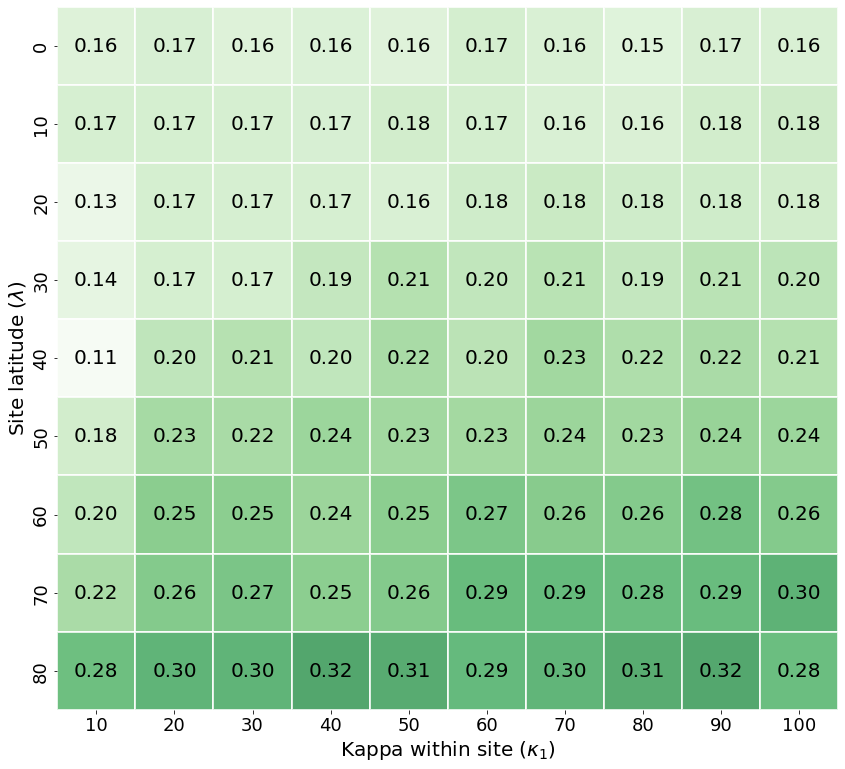

In [6]:
plt.figure(figsize=(14,14))
sns.heatmap(df_critical.pivot('site_lat', 'kappa_within_site', 'critical'), fmt=".2f",
            square=True, annot=True, linewidths=0.1, 
            vmin=0.1, vmax=0.4, cmap="Greens", alpha=0.8,
            cbar=False,
            cbar_kws = {'location': 'right', "boundaries":np.arange(0.12, 0.321, 0.02), "fraction": 0.04},
            annot_kws={"fontsize": 20, "color":'black'})
            # cmap=sns.color_palette("YlOrBr", as_cmap=True));

plt.ylabel("Site latitude ($\lambda$)", fontsize=20)
plt.xlabel("Kappa within site ($\kappa_1$)", fontsize=20)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.savefig("Figure3d.pdf", format="pdf", bbox_inches='tight')
plt.savefig("Figure3d.png", format="png", bbox_inches='tight')